In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

# Seattle temperature

In [3]:
data= pd.read_csv('data/seattleWeather_1948-2017.csv')

data.columns= [x.lower() for x in data.columns]

# parse time
data['date']= pd.to_datetime(data['date'], format='%Y-%m-%d')

start_date= '1997-01-01'
end_date= '2016-12-31'

data= data.loc[(data['date']>= start_date) & (data['date']<= end_date)].reset_index(drop=True)

data= data.drop(['rain','prcp'], axis= 1)

data.head()

,date,tmax,tmin
0,1997-01-01,55,48
1,1997-01-02,51,42
2,1997-01-03,44,39
3,1997-01-04,40,37
4,1997-01-05,42,34


In [43]:
label_years= pd.date_range(start_date, end_date, freq='Y').strftime("%Y").tolist()
label_years= np.reshape(label_years, -1)

In [45]:
year_slices_max= [np.asarray(data.loc[(data['date']>= y+'-01-01') & 
                                      (data['date']<= y+'-12-31')]['tmax']) for y in label_years]

year_slices_min= [np.asarray(data.loc[(data['date']>= y+'-01-01') & 
                                      (data['date']<= y+'-12-31')]['tmin']) for y in label_years]

In [95]:
import matplotlib.colors as mcolors

PALETTE= list((mcolors.TABLEAU_COLORS).values())

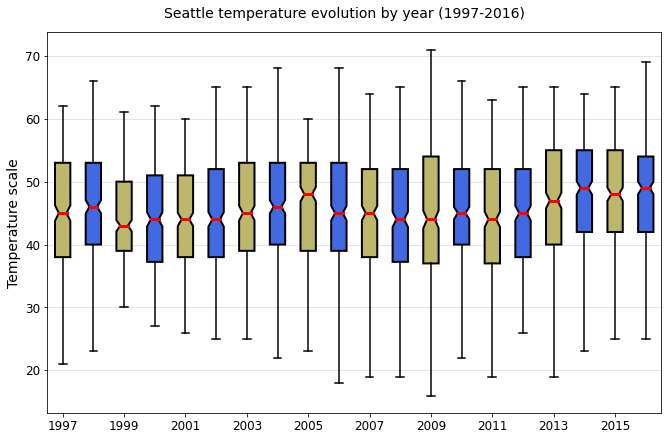

In [116]:
fig, ax= plt.subplots(figsize= (11,7))

bplot= ax.boxplot(year_slices_min, patch_artist=True, notch=True, showfliers= False)

# Remove spines
#ax.spines["left"].set_color("none")
#ax.spines["bottom"].set_color("none")
#ax.spines["right"].set_color("none")
#ax.spines["top"].set_color("none")

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.75)

plt.yticks(fontsize=12)
ax.set_ylabel('Temperature scale', size=14)

plt.xticks(fontsize=12)
ax.set_xticklabels(label_years)

# Setting the number of ticks 
plt.locator_params(axis='x', nbins=10) 


# changing color and linewidth of whiskers
for whisker in bplot['whiskers']:
    whisker.set(color='black', linewidth= 1.5)
    
# changing color and linewidth of caps
for cap in bplot['caps']:
    cap.set(color='black', linewidth= 1.5)

# changing color and linewidth of medians
for median in bplot['medians']:
    median.set(color='red', linewidth= 3)

# changing style of fliers
for flier in bplot['fliers']:
    flier.set(marker='D', color='black', alpha= 0.5)


box_colors= ['darkkhaki', 'royalblue']

for idx, box in enumerate(bplot['boxes']):
    box.set(color='black', linewidth= 2)
    box.set_facecolor(box_colors[idx % 2])

# fill with multiple colors
#for patch, color in zip(bplot['boxes'], colors):
#    patch.set_facecolor(color)

fig.suptitle('Seattle temperature evolution by year (1997-2016)', fontsize=14, x=0.5, y=0.93)

plt.show()

#plt.savefig('boxplot.pdf', pad_inches=0.01, bbox_inches="tight")